## Computer Vision Series 4: Recognition of Handwritten Digits in OpenCV with Python

In [1]:
import numpy as np
import cv2
# conda install -c https://conda.binstar.org/menpo opencv3
# print cv2.__version__

%matplotlib inline
import matplotlib.pyplot as plt

import os
# os.getcwd()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## import the data

In [2]:
# all files
files = os.listdir('./hand_digit')
files

['2-2.jpg', '2-3.jpg', 'demo.png', 'standData.png']

In [3]:
# the path of files
file_path = ['./hand_digit/' + x for x in files]
file_path

['./hand_digit/2-2.jpg',
 './hand_digit/2-3.jpg',
 './hand_digit/demo.png',
 './hand_digit/standData.png']

In [4]:
page_list = []
for files in file_path:
    page_list.append(cv2.imread(files, 0)) 

### use demo.png as an example

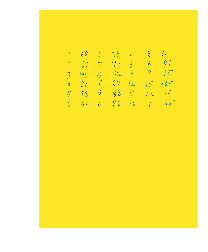

In [5]:
plt.imshow(page_list[2])
plt.axis('off');

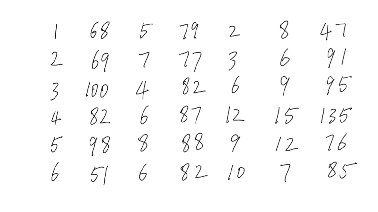

In [6]:
plt.imshow(cv2.imread('./hand_graph/picture_1.png'))
plt.axis('off');

## get individual digit number graph

In [7]:
rois = []  
page = page_list[2]
fushi = cv2.erode(page, None, iterations = 3) 
#cv2.imwrite('C:\\Users\\kongbeibei\\hand_graph\\fushi.jpg', fushi)
thresh = cv2.Canny(fushi, 300, 550)
#cv2.imwrite('C:\\Users\\kongbeibei\\hand_graph\\edge.jpg', thresh)
im2,contours,hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for cnt in contours:  
    x,y,w,h = cv2.boundingRect(cnt)
    if w > 14 and h > 60:  
        cv2.rectangle(page,(x,y),(x+w,y+h),(255, 0, 0), 2)
        rois.append((x,y,w,h))  
#cv2.imwrite('C:\\Users\\kongbeibei\\hand_graph\\0428.jpg', page)
print rois
print len(rois)

[(1457, 1433, 46, 66), (659, 1431, 79, 89), (728, 1424, 30, 112), (1227, 1422, 75, 77), (1407, 1420, 35, 89), (1691, 1415, 62, 105), (921, 1413, 48, 99), (1148, 1410, 55, 102), (2016, 1406, 101, 95), (443, 1406, 47, 109), (1954, 1403, 51, 93), (1721, 1273, 73, 79), (1668, 1266, 33, 84), (651, 1266, 48, 114), (1430, 1264, 50, 91), (719, 1264, 51, 98), (440, 1261, 69, 98), (1941, 1255, 49, 95), (916, 1252, 58, 102), (1157, 1251, 51, 107), (2007, 1249, 55, 98), (1226, 1245, 50, 100), (442, 1126, 60, 84), (708, 1117, 62, 83), (1434, 1116, 69, 71), (1959, 1114, 44, 89), (1915, 1109, 24, 91), (2014, 1107, 76, 90), (1718, 1107, 81, 96), (656, 1107, 48, 101), (1666, 1105, 28, 98), (1208, 1103, 57, 101), (1398, 1101, 25, 97), (1146, 1096, 51, 100), (928, 1096, 53, 109), (710, 979, 47, 80), (662, 978, 39, 78), (438, 972, 50, 103), (632, 968, 28, 86), (905, 963, 75, 107), (1217, 962, 75, 73), (1160, 944, 43, 98), (2012, 935, 78, 93), (1945, 935, 49, 112), (1693, 935, 56, 114), (1428, 935, 45, 100

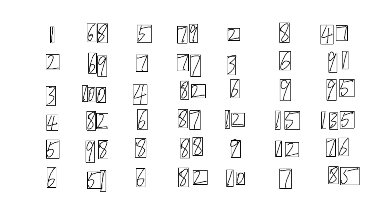

In [8]:
plt.imshow(cv2.imread('./hand_graph/picture_2.png'))
plt.axis('off');

In [9]:
raw_digit = [page_list[2][y:(y+h), x:(x+w)] for x, y, w, h in rois]

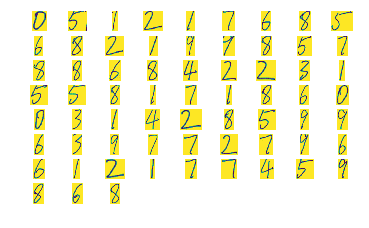

In [10]:
for i in range(1, 67):
    plt.subplot(9, 9, i)
    plt.imshow(raw_digit[i - 1])
    plt.axis('off');

In [11]:
digit_32_32 = [cv2.resize(x, (32, 32)) for x in raw_digit]

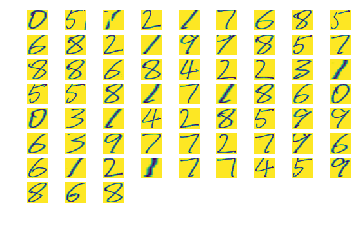

In [12]:
for i in range(1, 67):
    plt.subplot(9, 9, i)
    plt.imshow(digit_32_32[i - 1])
    plt.axis('off');

In [13]:
data = np.array([np.array(x).ravel() for x in digit_32_32])

In [14]:
data.shape

(66L, 1024L)

In [15]:
train = data[:56]

In [16]:
train.shape

(56L, 1024L)

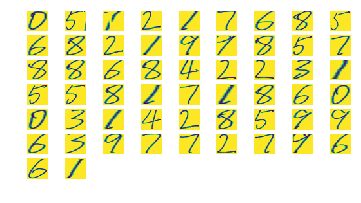

In [17]:
for i in range(1, 57):
    plt.subplot(9, 9, i)
    plt.imshow(digit_32_32[i - 1])
    plt.axis('off');

In [18]:
test = data[56:]

In [19]:
test.shape

(10L, 1024L)

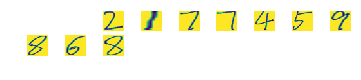

In [20]:
for i in range(57, 67):
    plt.subplot(9, 9, i)
    plt.imshow(digit_32_32[i - 1])
    plt.axis('off');

In [21]:
target = [0,5,1,2,1,7,6,8,5,
          6,8,2,1,9,9,8,5,7,
          8,8,6,8,4,2,2,3,1,
          5,5,8,1,7,1,8,6,0,
          0,3,1,4,2,8,5,9,9,
          6,3,9,7,7,2,7,9,6,
          6,1,2,1,7,7,4,5,9,
          8,6, 8]

In [22]:
len(target)

66

In [23]:
target_train = target[:56]

In [24]:
len(target_train)

56

In [25]:
target_test = target[56:]

In [26]:
target_test

[2, 1, 7, 7, 4, 5, 9, 8, 6, 8]

## train classification model

In [27]:
knn = KNeighborsClassifier(weights = 'distance')

In [28]:
cross_val_score(knn, train, target_train, cv = 3)

D:\application\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


array([ 0.85      ,  0.78947368,  0.88235294])

In [29]:
y_pred = knn.fit(train, target_train).predict(test)
print 'Prediction Values are: ', y_pred
print 'True Values are:       ', np.array(target_test)
print 'Accuracy Value is:     ', round((y_pred == np.array(target_test)).sum()/float(len(target_test)), 3)
print('Classification Report:\n\n%s' % classification_report(np.array(target_test), y_pred))
print("Confusion matrix:\n\n%s\n" % confusion_matrix(np.array(target_test), y_pred))

Prediction Values are:  [2 1 7 7 7 5 7 8 6 8]
True Values are:        [2 1 7 7 4 5 9 8 6 8]
Accuracy Value is:      0.8
Classification Report:

             precision    recall  f1-score   support

          1       1.00      1.00      1.00         1
          2       1.00      1.00      1.00         1
          4       0.00      0.00      0.00         1
          5       1.00      1.00      1.00         1
          6       1.00      1.00      1.00         1
          7       0.50      1.00      0.67         2
          8       1.00      1.00      1.00         2
          9       0.00      0.00      0.00         1

avg / total       0.70      0.80      0.73        10

Confusion matrix:

[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 2 0]
 [0 0 0 0 0 1 0 0]]



D:\application\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
